In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data sets/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
y = df.pop("charges")
X = df


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1002, 6) (1002,)
(335, 6) (335,)


In [ ]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [ ]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
1075,-0.515609,-0.200981,-0.073709
131,1.539050,-1.435875,-0.894334
15,-1.436663,-1.017156,-0.073709
825,1.751601,0.164581,0.746916
1137,-0.940711,-1.404799,-0.894334


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                               columns=encoder_.get_feature_names_out(),
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (1002, 3)
Shape of Data after Transformation: (1002, 8)


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1075,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
131,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
15,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
825,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1137,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                               columns=encoder_.get_feature_names_out(),
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (1002, 3)
Shape of Data after Transformation: (1002, 5)


,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,0.0,0.0,0.0,1.0,0.0
131,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,1.0
825,0.0,0.0,0.0,0.0,0.0
1137,0.0,0.0,1.0,0.0,0.0


In [ ]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['sex' 'smoker' 'region']
Unique Categories: [array(['female', 'male'], dtype=object), array(['no', 'yes'], dtype=object), array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]
Feature Names after encoding: ['sex_male' 'smoker_yes' 'region_northwest' 'region_southeast'
 'region_southwest']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                               columns=encoder_.get_feature_names_out(),
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (1002, 3)
Shape of Data after Transformation: (1002, 0)


""
1075
131
15
825
1137


In [ ]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
1075
131
15
825
1137


In [ ]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,age,bmi,children,sex,smoker,region
1075,-0.515609,-0.200981,-0.073709,1,0,1
131,1.539050,-1.435875,-0.894334,1,0,3
15,-1.436663,-1.017156,-0.073709,0,0,2
825,1.751601,0.164581,0.746916,1,0,3
1137,-0.940711,-1.404799,-0.894334,1,0,4


In [ ]:
sex_encoder = {'female' : 1, 'male' : 0}
smoker_encoder = {'yes':1, 'no':0}
region_encoder = {'southeast':1,'southwest':2, 'northeast':3,'northwest':4}

# Apply Label Encoding
X_train_cat_transformed['sex'] = X_train_cat['sex'].map(sex_encoder)
X_train_cat_transformed['smoker'] = X_train_cat['smoker'].map(smoker_encoder)
X_train_cat_transformed['region'] = X_train_cat['region'].map(region_encoder)

X_train_cat_transformed.head()

,sex,smoker,region
1075,1,0,1
131,1,0,3
15,0,0,2
825,1,0,3
1137,1,0,4


**preparing test data**

In [ ]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [ ]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = scaler.get_feature_names_out(),
                                   index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
1248,-1.507514,1.472261,-0.894334
610,0.547145,-0.236964,-0.073709
393,0.688846,0.086889,-0.073709
503,-1.436663,-0.093030,-0.894334
198,0.830547,-2.088489,-0.894334


In [ ]:
X_test_cat_transformed = pd.DataFrame(index = X_test_cat.index)

X_test_cat_transformed['sex'] = X_test_cat['sex'].map(sex_encoder)
X_test_cat_transformed['smoker'] = X_test_cat['smoker'].map(smoker_encoder)
X_test_cat_transformed['region'] = X_test_cat['region'].map(region_encoder)

X_test_cat_transformed.head()

,sex,smoker,region
1248,1,0,1
610,1,0,1
393,0,0,3
503,0,1,1
198,1,0,4


In [ ]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,age,bmi,children,sex,smoker,region
1248,-1.507514,1.472261,-0.894334,1,0,1
610,0.547145,-0.236964,-0.073709,1,0,1
393,0.688846,0.086889,-0.073709,0,0,3
503,-1.436663,-0.093030,-0.894334,0,1,1
198,0.830547,-2.088489,-0.894334,1,0,4


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred =regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

4283.254936134329

In [ ]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
1248,1633.9618,4860.558490,4211.890170
610,8547.6913,9231.211774,7948.160220
393,9290.1395,10929.129776,9336.827060
503,32548.3405,26191.691055,21088.622942
198,9644.2525,7118.256770,10466.076060
...,...,...,...
824,12523.6048,11276.951746,12574.637660
970,10702.6424,10542.975328,13872.595092
1327,9377.9047,10451.877526,13810.286066
793,21195.8180,31647.351218,19349.099040


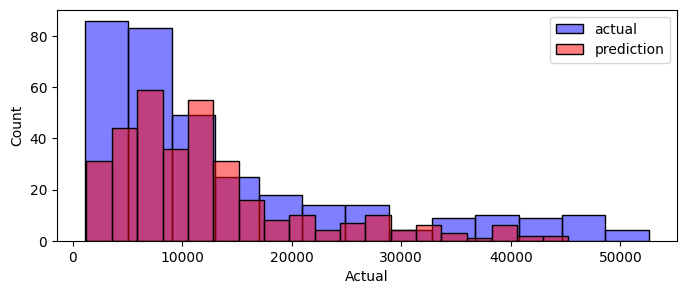

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

4363.059574362474

In [ ]:
output_df = pd.DataFrame({'Actual': y_test})

In [ ]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
1248,1633.9618,4860.558490
610,8547.6913,9231.211774
393,9290.1395,10929.129776
503,32548.3405,26191.691055
198,9644.2525,7118.256770
...,...,...
824,12523.6048,11276.951746
970,10702.6424,10542.975328
1327,9377.9047,10451.877526
793,21195.8180,31647.351218


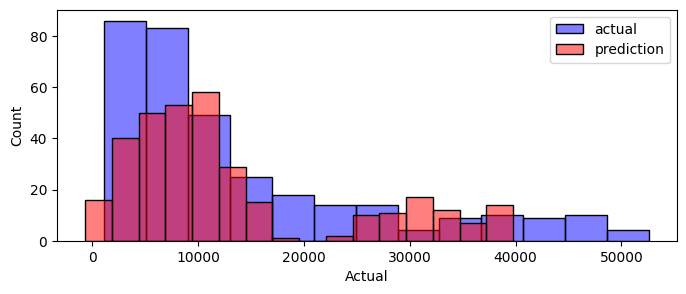

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [ ]:
 from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

3356.683083952239

In [ ]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
1248,1633.9618,4860.558490,4211.890170,1634.57340
610,8547.6913,9231.211774,7948.160220,8233.09750
393,9290.1395,10929.129776,9336.827060,9288.02670
503,32548.3405,26191.691055,21088.622942,33750.29180
198,9644.2525,7118.256770,10466.076060,9174.13565
...,...,...,...,...
824,12523.6048,11276.951746,12574.637660,13112.60480
970,10702.6424,10542.975328,13872.595092,10381.47870
1327,9377.9047,10451.877526,13810.286066,8703.45600
793,21195.8180,31647.351218,19349.099040,22412.64850


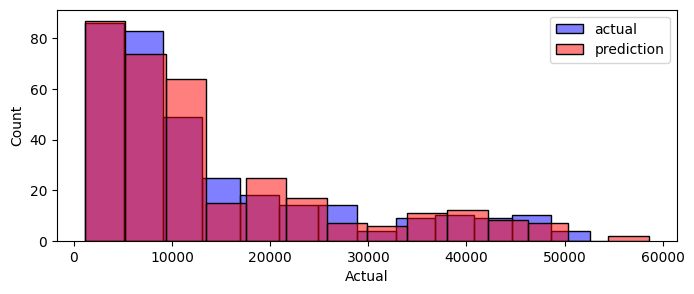

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

2856.6497506929854

In [ ]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
1248,1633.9618,4860.558490,4211.890170,1634.57340,2243.900305
610,8547.6913,9231.211774,7948.160220,8233.09750,9743.380527
393,9290.1395,10929.129776,9336.827060,9288.02670,9267.293828
503,32548.3405,26191.691055,21088.622942,33750.29180,34363.789446
198,9644.2525,7118.256770,10466.076060,9174.13565,10087.246257
...,...,...,...,...,...
824,12523.6048,11276.951746,12574.637660,13112.60480,17520.761979
970,10702.6424,10542.975328,13872.595092,10381.47870,10722.168897
1327,9377.9047,10451.877526,13810.286066,8703.45600,9644.782593
793,21195.8180,31647.351218,19349.099040,22412.64850,24355.150821


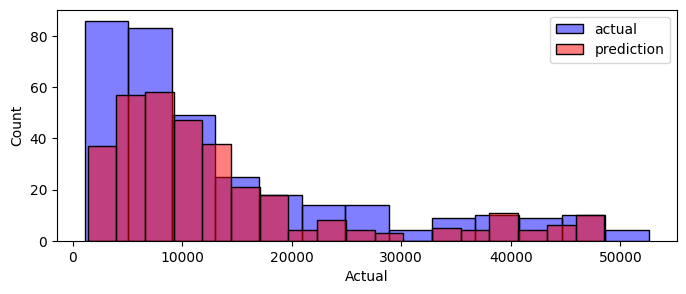

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [ ]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,1633.9618
1,Actual,8547.6913
2,Actual,9290.1395
3,Actual,32548.3405
4,Actual,9644.2525


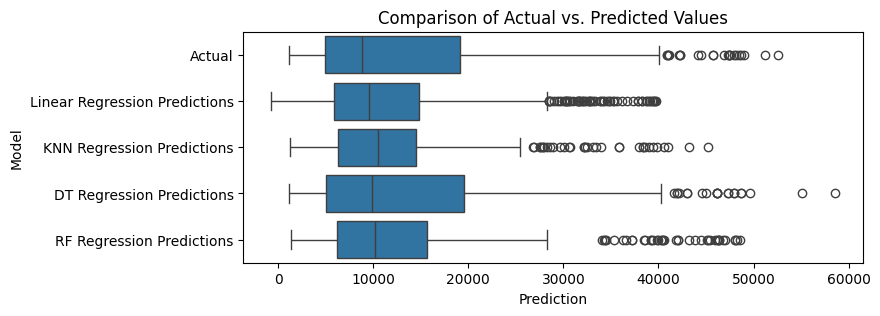

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()